In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Salary Prediction of Data Professions.csv')

In [6]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [8]:
df.shape

(2639, 13)

In [10]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


## Data Preprocessing

In [12]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [15]:
print(df.duplicated().sum())

161


In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.columns = df.columns.str.title()
print(df.columns)

Index(['First Name', 'Last Name', 'Sex', 'Doj', 'Current Date', 'Designation',
       'Age', 'Salary', 'Unit', 'Leaves Used', 'Leaves Remaining', 'Ratings',
       'Past Exp'],
      dtype='object')


In [18]:
df.columns = df.columns.str.replace(' ','')

In [19]:
print(df.columns)

Index(['FirstName', 'LastName', 'Sex', 'Doj', 'CurrentDate', 'Designation',
       'Age', 'Salary', 'Unit', 'LeavesUsed', 'LeavesRemaining', 'Ratings',
       'PastExp'],
      dtype='object')


In [22]:
df[['Doj','CurrentDate']]=df[['Doj','CurrentDate']].apply(pd.to_datetime)

In [23]:
df.dropna(inplace = True)

In [25]:
df[['Age','LeavesUsed','LeavesRemaining']]=df[['Age','LeavesUsed','LeavesRemaining']].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FirstName        2470 non-null   object        
 1   LastName         2470 non-null   object        
 2   Sex              2470 non-null   object        
 3   Doj              2470 non-null   datetime64[ns]
 4   CurrentDate      2470 non-null   datetime64[ns]
 5   Designation      2470 non-null   object        
 6   Age              2470 non-null   int32         
 7   Salary           2470 non-null   int64         
 8   Unit             2470 non-null   object        
 9   LeavesUsed       2470 non-null   int32         
 10  LeavesRemaining  2470 non-null   int32         
 11  Ratings          2470 non-null   float64       
 12  PastExp          2470 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(2), object(5)
memory usage: 241.2+ KB


In [30]:
df['YearsWorked'] = df['CurrentDate']-df['Doj']

In [31]:
df['YearsWorked'] = df['YearsWorked'].dt.days

In [32]:
df['YearsWorked']

0        599
2        528
3       1009
6        857
8        557
        ... 
2634    1654
2635     723
2636     714
2637     661
2638     476
Name: YearsWorked, Length: 2470, dtype: int64

In [33]:
df.head()

,FirstName,LastName,Sex,Doj,CurrentDate,Designation,Age,Salary,Unit,LeavesUsed,LeavesRemaining,Ratings,PastExp,YearsWorked
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2.0,0,599
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3.0,0,528
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3.0,0,1009
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5.0,0,857
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3.0,1,557


In [34]:
df['YearsWorked'] = df['YearsWorked'] / 365.25

In [35]:
df.head()

,FirstName,LastName,Sex,Doj,CurrentDate,Designation,Age,Salary,Unit,LeavesUsed,LeavesRemaining,Ratings,PastExp,YearsWorked
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2.0,0,1.639973
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3.0,0,1.445585
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3.0,0,2.762491
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5.0,0,2.346338
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3.0,1,1.524983


In [36]:
df['YearsWorked'] = df['YearsWorked'].round(0)

In [37]:
df.head()

,FirstName,LastName,Sex,Doj,CurrentDate,Designation,Age,Salary,Unit,LeavesUsed,LeavesRemaining,Ratings,PastExp,YearsWorked
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2.0,0,2.0
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3.0,0,1.0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3.0,0,3.0
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5.0,0,2.0
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3.0,1,2.0


## Explorartry Data Analysis

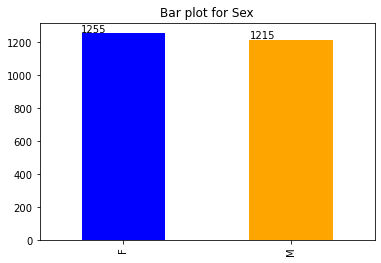

In [45]:
# colors = ['blue', 'orange']
# df.Sex.value_counts().plot.bar(color=colors)
# plt.title('Bar plot for Sex') 

ax = df.Sex.value_counts().plot.bar(color=colors)
plt.title('Bar plot for Sex')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

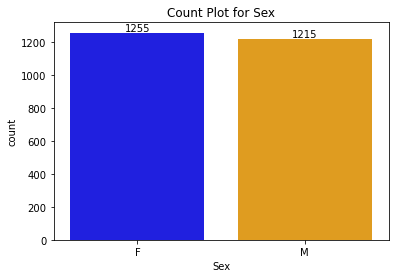

In [46]:
ax = sns.countplot(x='Sex', data=df, palette=colors)
plt.title('Count Plot for Sex')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

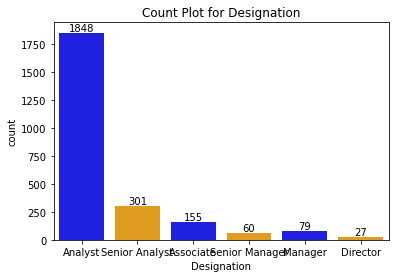

In [67]:
ax = sns.countplot(x='Designation', data=df, palette=colors)
plt.title('Count Plot for Designation')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

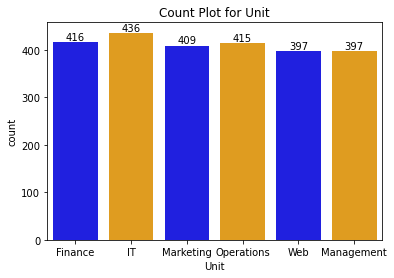

In [68]:
ax = sns.countplot(x='Unit', data=df, palette=colors)
plt.title('Count Plot for Unit')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

### Distribution of ages

Bin 1: 748
Bin 2: 372
Bin 3: 372
Bin 4: 442
Bin 5: 75
Bin 6: 174
Bin 7: 33
Bin 8: 25
Bin 9: 27
Bin 10: 61
Bin 11: 38
Bin 12: 32
Bin 13: 12
Bin 14: 11
Bin 15: 10
Bin 16: 21
Bin 17: 4
Bin 18: 4
Bin 19: 3
Bin 20: 6


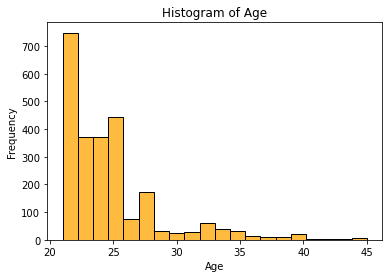

In [59]:
sns.histplot(df['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
for i in range(len(hist)):
    print(f'Bin {i+1}: {hist[i]}')

# Show plot
plt.show() 


Text(0.5, 1.0, 'Distribution of Designations')

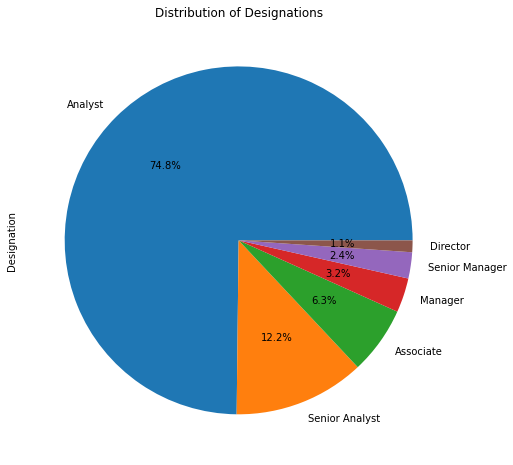

In [66]:
df['Designation'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plt.title('Distribution of Designations')

In [72]:
job_Age = df.groupby('Designation')['Age'].agg(['mean','min','max']).reset_index()

In [73]:
job_Age.head()

,Designation,mean,min,max
0,Analyst,22.995130,21,25
1,Associate,29.987097,28,32
2,Director,41.666667,39,45
3,Manager,33.316456,32,35
4,Senior Analyst,26.458472,25,28


<Figure size 864x432 with 0 Axes>

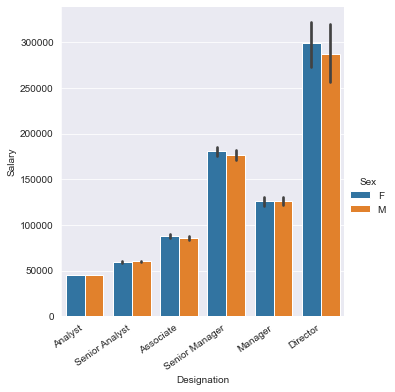

In [76]:
plt.figure(figsize = (12,6) )
sns.set_style('darkgrid')
sns.catplot(x = 'Designation',y = 'Salary',data = df, kind ='bar',hue ='Sex' )
plt.xticks(rotation =35, ha = 'right')
plt.show()


<Figure size 864x432 with 0 Axes>

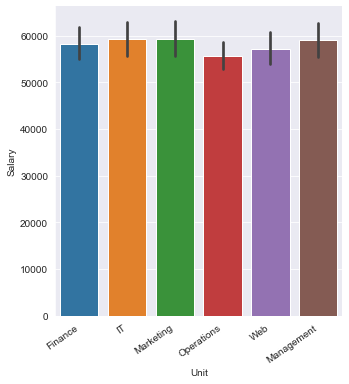

In [77]:
plt.figure(figsize = (12,6) )
sns.set_style('darkgrid')
sns.catplot(x = 'Unit',y = 'Salary',data = df, kind ='bar')
plt.xticks(rotation =35, ha = 'right')
plt.show()

In [78]:
df = df.reset_index()

In [79]:
df.head()

,index,FirstName,LastName,Sex,Doj,CurrentDate,Designation,Age,Salary,Unit,LeavesUsed,LeavesRemaining,Ratings,PastExp,YearsWorked
0,0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2.0,0,2.0
1,2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3.0,0,1.0
2,3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3.0,0,3.0
3,6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5.0,0,2.0
4,8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3.0,1,2.0


In [81]:
df.to_csv('new_file.csv',index= False)

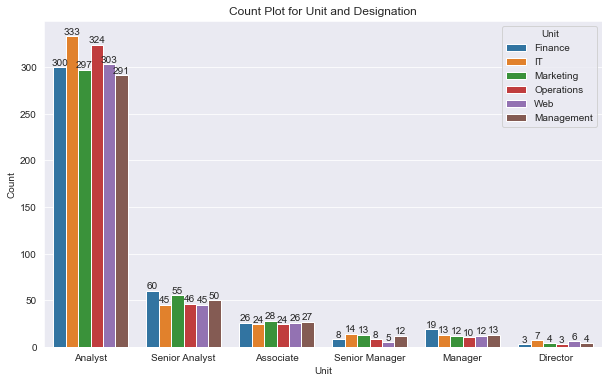

In [94]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Designation', hue='Unit')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}',
            ha='center', va='bottom')


# Add labels and title
plt.xlabel('Unit')
plt.ylabel('Count')
plt.title('Count Plot for Unit and Designation')

# Show plot
plt.show()

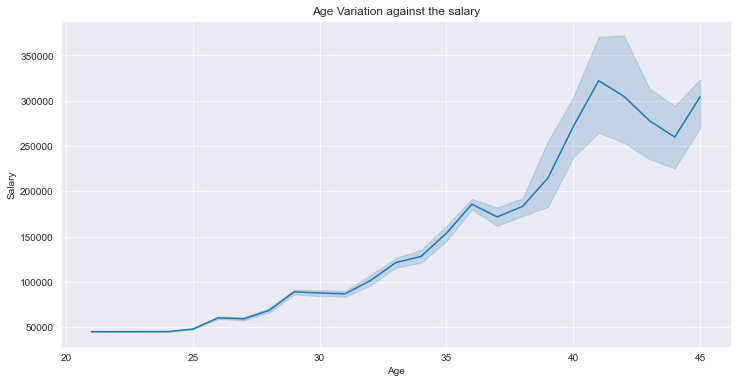

In [99]:
plt.figure(figsize = (12,6) )
sns.set_style('darkgrid')
sns.lineplot(x = 'Age',y = 'Salary',data = df)
plt.title('Age Variation against the salary')
plt.show()

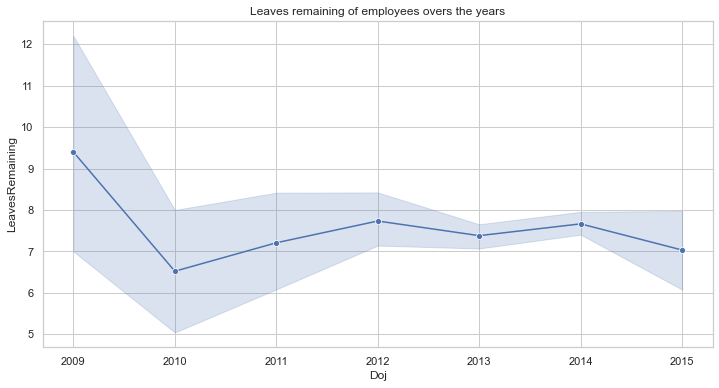

In [104]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,6) )
sns.lineplot(x = df['Doj'].dt.year,y = 'LeavesRemaining',data = df,marker ='o' )
plt.title('Leaves remaining of employees overs the years')
plt.show()

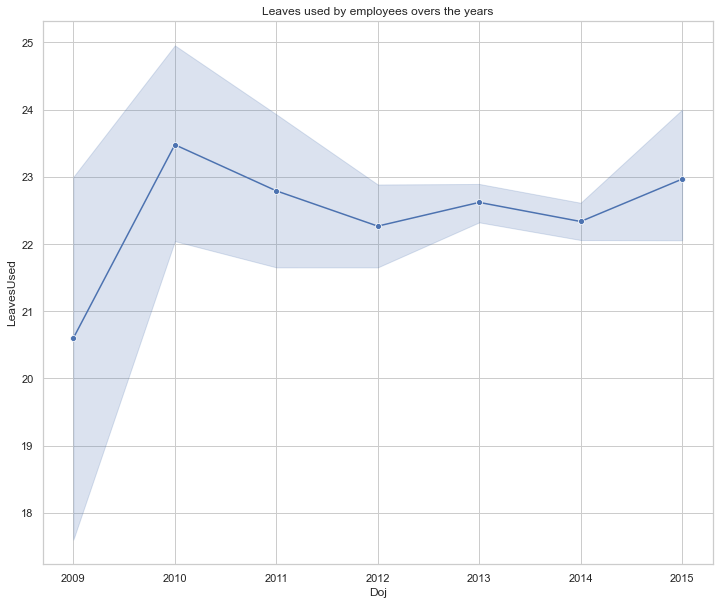

In [106]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,10) )
sns.lineplot(x = df['Doj'].dt.year,y = 'LeavesUsed',data = df,marker ='o' )
plt.title('Leaves used by employees overs the years')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


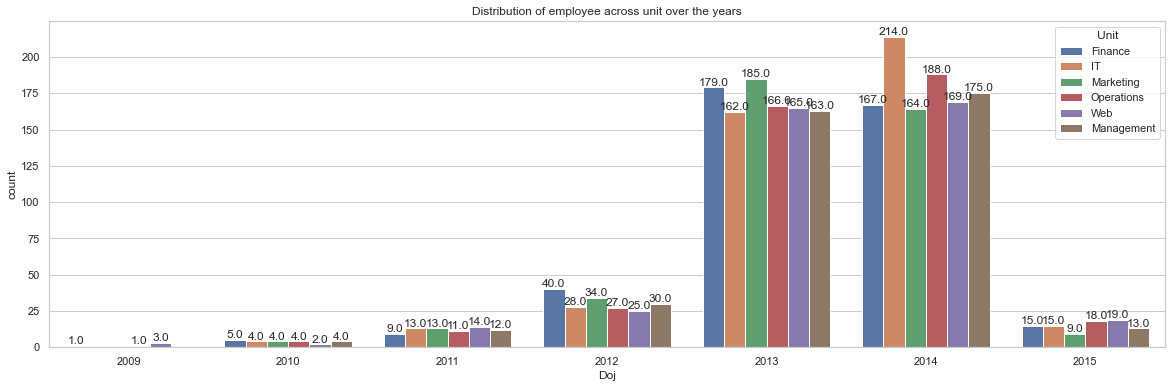

In [105]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x=df['Doj'].dt.year, hue='Unit')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}',
            ha='center', va='bottom')
plt.title('Distribution of employee across unit over the years')

plt.show()

Text(0.5, 1.0, 'Comaprision of year worked by male and female employee')

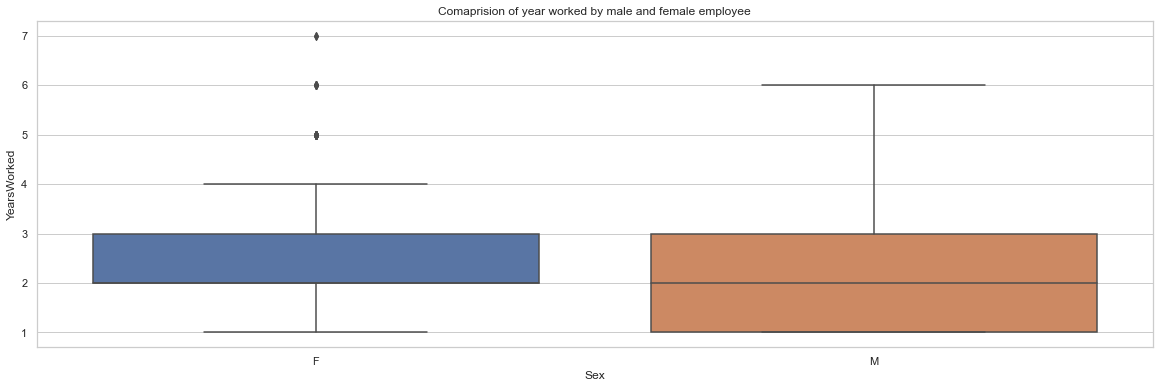

In [108]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = 'Sex' ,y = 'YearsWorked',data = df)
plt.title("Comaprision of year worked by male and female employee")

In [111]:
gropu_Rating = df.groupby('Unit')['Ratings'].agg(['mean','median'])

In [112]:
gropu_Rating

,mean,median
Unit,,
Finance,3.442308,3.0
IT,3.483945,3.5
Management,3.526448,4.0
Marketing,3.462103,3.0
Operations,3.534940,4.0
Web,3.443325,3.0


Text(0.5, 1.0, 'Comaprision of Rating of different Unit')

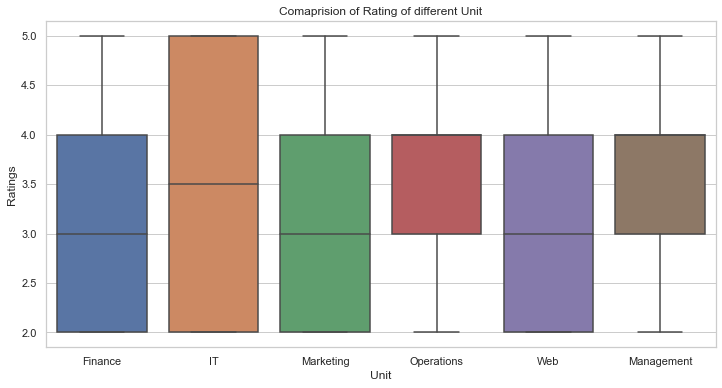

In [113]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Unit' ,y = 'Ratings',data = df)
plt.title("Comaprision of Rating of different Unit")

In [114]:
df['PastExp'].corr(df['Salary'])

0.8510257365424908

In [115]:
correlation = df['PastExp'].corr(df['Salary'])
print(f'The correlation between PastExp and Salary is: {correlation}') 

The correlation between PastExp and Salary is: 0.8510257365424908


Text(0.5, 1.0, 'Scatter plot for salary and past exeperiance')

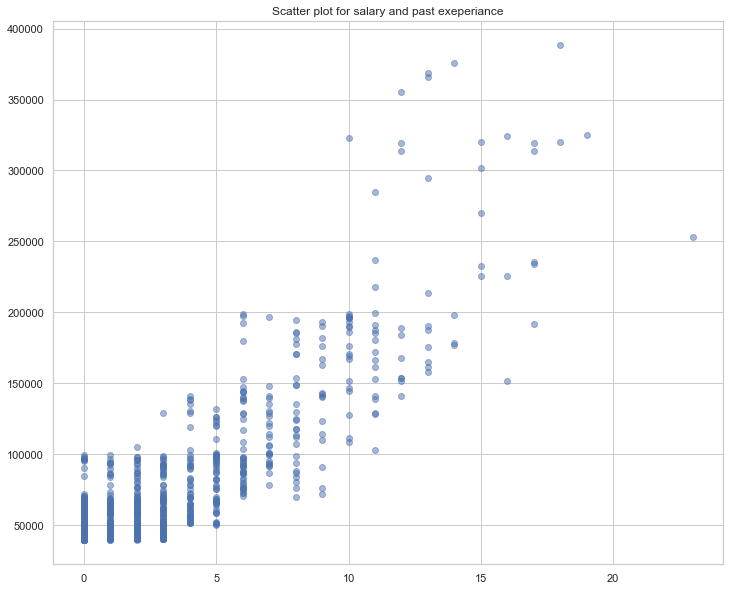

In [118]:
plt.figure(figsize=(12, 10))
plt.scatter(data = df,x = 'PastExp',y ='Salary',alpha = 0.5)
plt.title("Scatter plot for salary and past exeperiance")

In [119]:
correlation2 = df['Ratings'].corr(df['LeavesUsed'])
print(f'The correlation between PastExp and Salary is: {correlation2}') 

The correlation between PastExp and Salary is: 0.004865583997704822


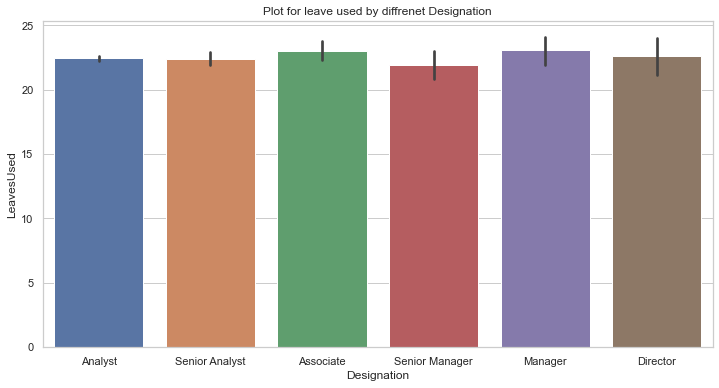

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(x ='Designation',y  = 'LeavesUsed',data  = df )

plt.title('Plot for leave used by diffrenet Designation')

# Show plot
plt.show()

Text(0.5, 1.0, 'Comaprision of using leave of different Unit')

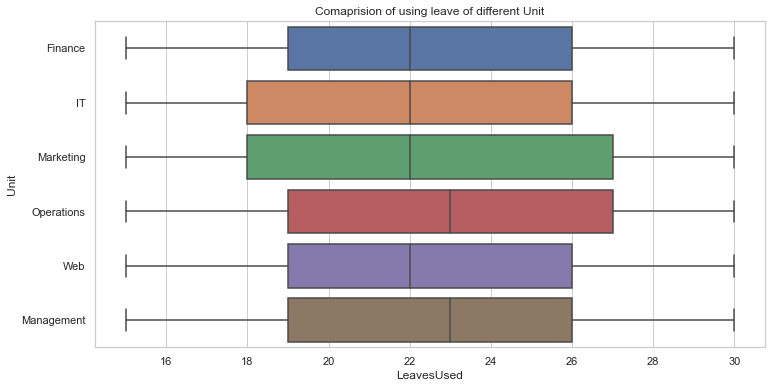

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'LeavesUsed' ,y = 'Unit',data = df)
plt.title("Comaprision of using leave of different Unit")

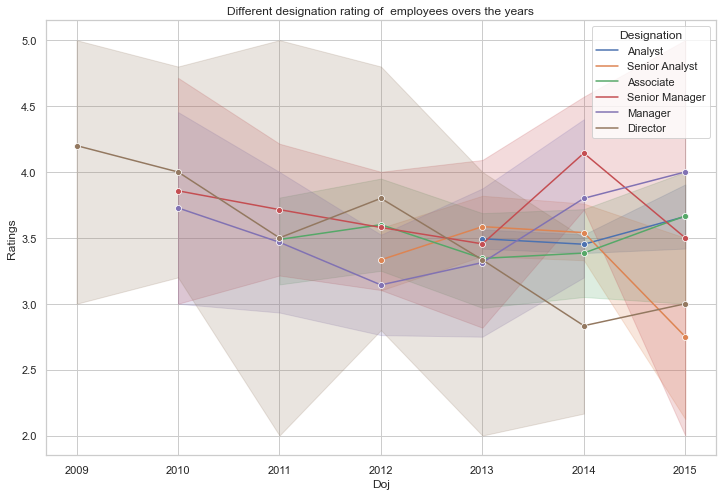

In [126]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = df['Doj'].dt.year,y = 'Ratings',hue = df.Designation, data = df,marker ='o' )
plt.title('Different designation rating of  employees overs the years')
plt.show()

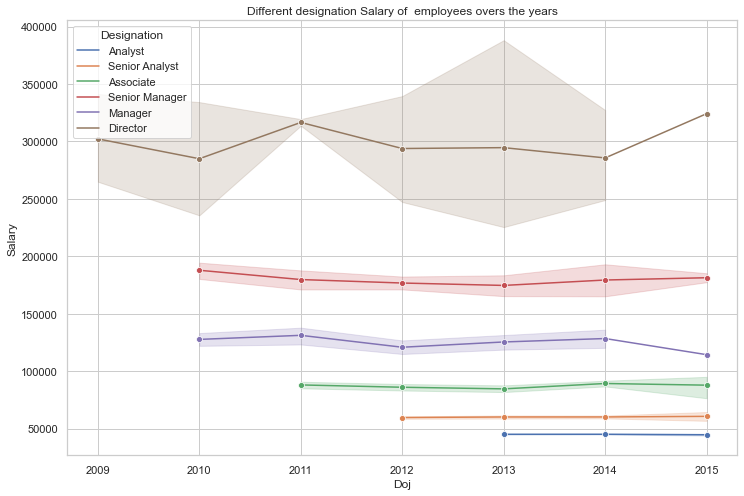

In [127]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = df['Doj'].dt.year,y = 'Salary',hue = df.Designation, data = df,marker ='o' )
plt.title('Different designation Salary of  employees overs the years')
plt.show()

Text(0.5, 1.0, ' Salary and Rating of employee according to designations')

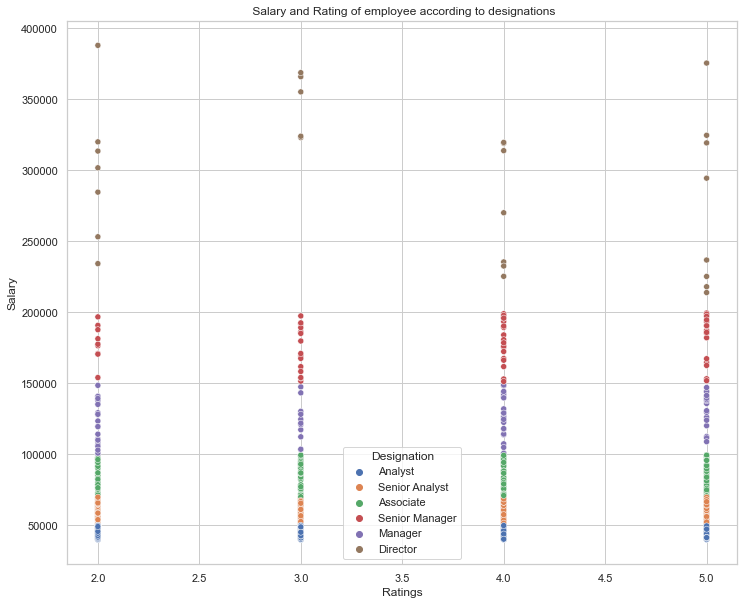

In [132]:
plt.figure(figsize=(12, 10))

sns.scatterplot(data = df,x = 'Ratings',y ='Salary',hue = df.Designation ,marker = 'o')
plt.title(" Salary and Rating of employee according to designations")

In [133]:
df

,index,FirstName,LastName,Sex,Doj,CurrentDate,Designation,Age,Salary,Unit,LeavesUsed,LeavesRemaining,Ratings,PastExp,YearsWorked
0,0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2.0,0,2.0
1,2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3.0,0,1.0
2,3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3.0,0,3.0
3,6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5.0,0,2.0
4,8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36,185977,Management,15,15,5.0,10,5.0
2466,2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23,45758,IT,17,13,2.0,0,2.0
2467,2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21,47315,Web,29,1,5.0,0,2.0
2468,2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24,45172,Web,23,7,3.0,1,2.0


# ML Model Development

In [134]:
x = df.drop(columns = ['index','FirstName','LastName','CurrentDate','LeavesRemaining','Doj','Salary'])
y = df['Salary'].values

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
x['Sex'] = le.fit_transform(x['Sex'])
x['Designation'] = le.fit_transform(x['Designation'])
x['Unit'] = le.fit_transform(x['Unit'])
x = x.values

In [137]:
x

array([[ 0.,  0., 21., ...,  2.,  0.,  2.],
       [ 0.,  0., 21., ...,  3.,  0.,  1.],
       [ 0.,  0., 22., ...,  3.,  0.,  3.],
       ...,
       [ 0.,  0., 21., ...,  5.,  0.,  2.],
       [ 0.,  0., 24., ...,  3.,  1.,  2.],
       [ 1.,  0., 24., ...,  2.,  2.,  1.]])

In [138]:
y

array([44570, 40955, 45550, ..., 47315, 45172, 49176], dtype=int64)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 21)

In [145]:
models = {'Random Forest' : RandomForestRegressor(max_depth = 10 ,min_samples_leaf = 4,n_estimators = 10),
         'Linear Regression' : LinearRegression(),
         'Decision Tree': DecisionTreeRegressor(max_depth = 10 ,min_samples_leaf = 2,min_samples_split = 10),
         'GradeientBoost': GradientBoostingRegressor(min_samples_split = 10,n_estimators= 50)}

In [147]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred, squared = False)
    r2 =r2_score(y_test,y_pred) 
    print(f' Evaluating {name} model')
    print("Mean absolute Error (MAE) :", mae)
    print("Mean squared Error (MSE) :" ,mse)
    print(" Root Mean squared Error (RMSE) :",rmse)
    print("R Squared error (R2) :",r2)
    print('\n')

 Evaluating Random Forest model
Mean absolute Error (MAE) : 3602.4431497168825
Mean squared Error (MSE) : 31803874.223804925
 Root Mean squared Error (RMSE) : 5639.492372882946
R Squared error (R2) : 0.9669763222597569


 Evaluating Linear Regression model
Mean absolute Error (MAE) : 10601.420801059045
Mean squared Error (MSE) : 191750434.92097548
 Root Mean squared Error (RMSE) : 13847.39812820356
R Squared error (R2) : 0.8008951826176555


 Evaluating Decision Tree model
Mean absolute Error (MAE) : 4116.304480419694
Mean squared Error (MSE) : 42925278.649209544
 Root Mean squared Error (RMSE) : 6551.7385974418685
R Squared error (R2) : 0.955428368284748


 Evaluating GradeientBoost model
Mean absolute Error (MAE) : 3653.907678576465
Mean squared Error (MSE) : 31995626.0611464
 Root Mean squared Error (RMSE) : 5656.467631052652
R Squared error (R2) : 0.9667772159861658




In [2]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Create the Flask app
app = flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()
        if not data:
            return jsonify({'error': 'No data provided'}), 400

        # Load data from JSON (replace with appropriate logic for your data format)
        X = pd.DataFrame(data)

        # Preprocess data
        X_preprocessed = preprocess_data(X)

        # Make predictions using the chosen model
        model_name = request.args.get('model', default='Random Forest')
        if model_name not in models:
            return jsonify({'error': f'Invalid model name: {model_name}'}), 400
        model = models[model_name]
        predictions = model.predict(X_preprocessed)

        # Return predictions as JSON
        return jsonify({'predictions': predictions.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

NameError: name 'flask' is not defined